 ### **Step 1: Load Raw Dataset**

In [1]:
#importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Walmart.csv', encoding_errors='ignore')
df.shape

(10051, 11)

### **Step 2: Inspecting Structure of data**

In [3]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [5]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [6]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [7]:
df.head()      # First 5 rows

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [8]:
df.tail(3)     # Last 3 rows

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
10048,9998,WALM050,Victoria,Fashion accessories,$52,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48
10050,10000,WALM069,Rockwall,Fashion accessories,$62,3.0,26/09/20,9:48:00,Cash,3.0,0.33


In [9]:
# Remove $ sign from unit_price column and convert it to float

df['Unit_Price_clean'] = df['unit_price'].str.replace('$', '', regex=False).astype(float)
df.head(10)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Unit_Price_clean
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,74.69
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,15.28
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,46.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,58.22
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,86.31
5,6,WALM026,Denton,Electronic accessories,$85.39,7.0,25/03/19,18:30:00,Ewallet,4.1,0.48,85.39
6,7,WALM088,Cleburne,Electronic accessories,$68.84,6.0,25/02/19,14:36:00,Ewallet,5.8,0.33,68.84
7,8,WALM100,Canyon,Home and lifestyle,$73.56,10.0,24/02/19,11:38:00,Ewallet,8.0,0.18,73.56
8,9,WALM066,Grapevine,Health and beauty,$36.26,2.0,10/01/19,17:15:00,Credit card,7.2,0.33,36.26
9,10,WALM065,Texas City,Food and beverages,$54.84,3.0,20/02/19,13:27:00,Credit card,5.9,0.33,54.84


### **Step 3: Handling Missing values**

In [10]:
df.isnull().sum()

invoice_id           0
Branch               0
City                 0
category             0
unit_price          31
quantity            31
date                 0
time                 0
payment_method       0
rating               0
profit_margin        0
Unit_Price_clean    31
dtype: int64

<Axes: >

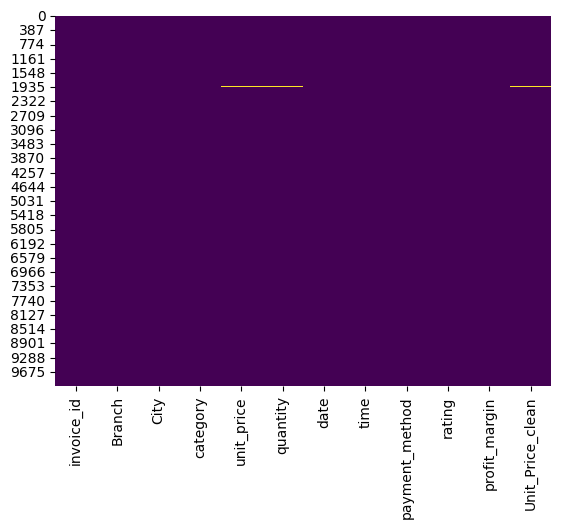

In [11]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


In [12]:
new_df = df.drop(columns=['unit_price'])
new_df.head()

,invoice_id,Branch,City,category,quantity,date,time,payment_method,rating,profit_margin,Unit_Price_clean
0,1,WALM003,San Antonio,Health and beauty,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,74.69
1,2,WALM048,Harlingen,Electronic accessories,5.0,08/03/19,10:29:00,Cash,9.6,0.48,15.28
2,3,WALM067,Haltom City,Home and lifestyle,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,46.33
3,4,WALM064,Bedford,Health and beauty,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,58.22
4,5,WALM013,Irving,Sports and travel,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,86.31


In [13]:
new_df.isnull().sum()

invoice_id           0
Branch               0
City                 0
category             0
quantity            31
date                 0
time                 0
payment_method       0
rating               0
profit_margin        0
Unit_Price_clean    31
dtype: int64

In [14]:
new_df.describe()

,invoice_id,quantity,rating,profit_margin,Unit_Price_clean
count,10051.000000,10020.000000,10051.000000,10051.000000,10020.000000
mean,5025.741220,2.353493,5.825659,0.393791,50.630053
std,2901.174372,1.602658,1.763991,0.090669,21.197783
min,1.000000,1.000000,3.000000,0.180000,10.080000
25%,2513.500000,1.000000,4.000000,0.330000,32.000000
50%,5026.000000,2.000000,6.000000,0.330000,51.000000
75%,7538.500000,3.000000,7.000000,0.480000,69.000000
max,10000.000000,10.000000,10.000000,0.570000,99.960000


In [15]:
new_df.fillna(new_df['Unit_Price_clean'].mean(), inplace=True)
new_df.isnull().sum()

invoice_id          0
Branch              0
City                0
category            0
quantity            0
date                0
time                0
payment_method      0
rating              0
profit_margin       0
Unit_Price_clean    0
dtype: int64

### **Step 4: Check Duplicates and Remove it**

In [16]:
new_df.duplicated().sum()

np.int64(51)

In [17]:
new_df[new_df.duplicated()]

,invoice_id,Branch,City,category,quantity,date,time,payment_method,rating,profit_margin,Unit_Price_clean
10000,9950,WALM038,Sugar Land,Fashion accessories,1.0,27/11/23,9:15:00,Cash,3.0,0.48,17.0
10001,9951,WALM082,Weslaco,Home and lifestyle,2.0,08/07/20,12:39:00,Cash,6.0,0.33,58.0
10002,9952,WALM035,San Angelo,Fashion accessories,3.0,02/10/21,16:34:00,Cash,6.0,0.48,76.0
10003,9953,WALM084,Schertz,Home and lifestyle,3.0,13/06/21,10:52:00,Cash,5.0,0.33,68.0
10004,9954,WALM046,Temple,Fashion accessories,1.0,22/08/20,14:38:00,Cash,6.0,0.48,40.0
10005,9955,WALM054,Sherman,Home and lifestyle,3.0,05/12/21,7:46:00,Cash,3.0,0.21,61.0
10006,9956,WALM003,San Antonio,Fashion accessories,3.0,29/10/20,7:13:00,Cash,4.0,0.48,17.0
10007,9957,WALM029,Round Rock,Home and lifestyle,1.0,20/06/23,13:41:00,Cash,4.0,0.48,53.0
10008,9958,WALM084,Schertz,Fashion accessories,2.0,10/04/22,14:58:00,Cash,7.0,0.33,35.0
10009,9959,WALM065,Texas City,Home and lifestyle,1.0,11/03/22,10:26:00,Cash,4.0,0.33,36.0


### **Step 5: Fixing Data Types**

In [18]:
new_df.dtypes

invoice_id            int64
Branch               object
City                 object
category             object
quantity            float64
date                 object
time                 object
payment_method       object
rating              float64
profit_margin       float64
Unit_Price_clean    float64
dtype: object

In [19]:
new_df["total_price"] = new_df["quantity"] * new_df["Unit_Price_clean"]
new_df.head()

,invoice_id,Branch,City,category,quantity,date,time,payment_method,rating,profit_margin,Unit_Price_clean,total_price
0,1,WALM003,San Antonio,Health and beauty,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,74.69,522.83
1,2,WALM048,Harlingen,Electronic accessories,5.0,08/03/19,10:29:00,Cash,9.6,0.48,15.28,76.40
2,3,WALM067,Haltom City,Home and lifestyle,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,46.33,324.31
3,4,WALM064,Bedford,Health and beauty,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,58.22,465.76
4,5,WALM013,Irving,Sports and travel,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,86.31,604.17


In [20]:
unique_branches = new_df['City'].drop_duplicates()
unique_branches

0       San Antonio
1         Harlingen
2       Haltom City
3           Bedford
4            Irving
           ...     
286          Laredo
335           Tyler
386         El Paso
397    Lake Jackson
456     Nacogdoches
Name: City, Length: 98, dtype: object

In [21]:
top_5 = new_df.sort_values(by='total_price', ascending=False).head(5)
top_5

,invoice_id,Branch,City,category,quantity,date,time,payment_method,rating,profit_margin,Unit_Price_clean,total_price
1915,1916,WALM015,Grand Prairie,Fashion accessories,50.630053,11/08/21,21:28:00,Ewallet,5.0,0.48,50.630053,2563.402256
1909,1910,WALM085,Kerrville,Fashion accessories,50.630053,24/08/22,11:53:00,Ewallet,4.0,0.33,50.630053,2563.402256
1896,1897,WALM093,Angleton,Home and lifestyle,50.630053,15/05/22,12:36:00,Ewallet,9.0,0.33,50.630053,2563.402256
1921,1922,WALM024,Carrollton,Fashion accessories,50.630053,16/03/21,15:39:00,Ewallet,8.0,0.48,50.630053,2563.402256
1895,1896,WALM069,Rockwall,Fashion accessories,50.630053,21/07/23,15:49:00,Ewallet,4.0,0.33,50.630053,2563.402256


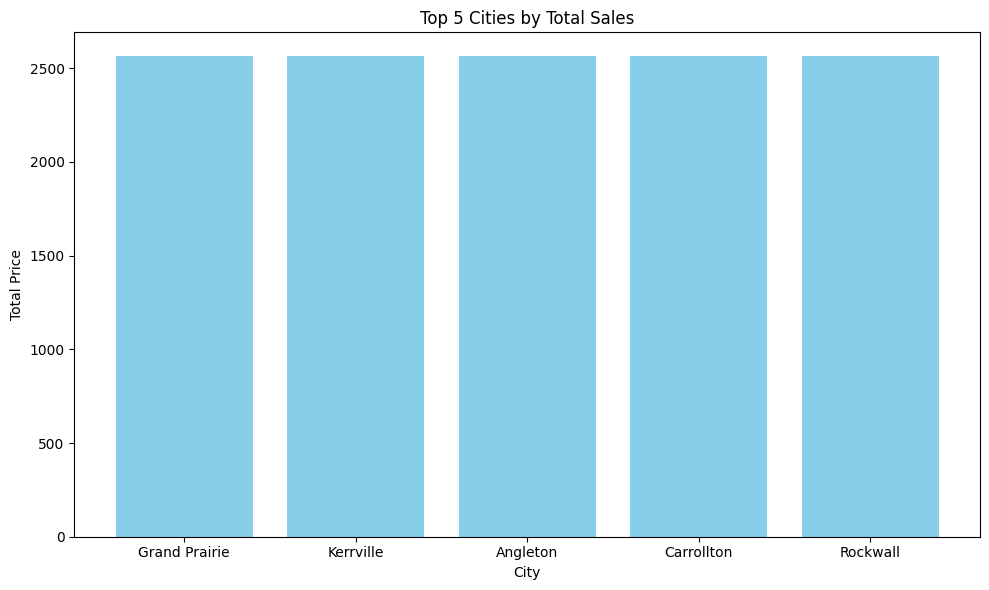

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(top_5['City'], top_5['total_price'], color='skyblue')
plt.title('Top 5 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.tight_layout()
plt.show()

## *Connection to Db*

In [26]:
# IMPORTING  dependencies
# for mysql
import pymysql
from sqlalchemy import create_engine

#psql
import psycopg2

In [ ]:
# mysql
# host = 'localhost'
# port = 3306
# user = 'root'
# password =

# postgres
# host = 'localhost'
# port = 5432
# user = 'admin'
# password = 'admin'